# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 0. Requisiti necessari per questo playbook

è necessario python versione $\ge$ 3.9, inoltre sono necesarie le seguenti librerie:

- **pandas**
- **numpy**
- **yfinance**
- **matplotlib**
- **seaborn**
- **scipy**

possono essere installate con:
```
pip install pandas
pip install numpy
pip install yfinance
pip install matplotlib
pip install seaborn
```

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (**FB**)
- Alphabet Inc. (**GOOG**)
- Raytheon Technologies Corporation (**RTX**)
- Lockheed Martin Corporation (**LMT**)
- Bank of America Corporation (**BAC**)
- JPMorgan Chase & Co. (**JPM**)

Importiamo ora i titoli direttamente da Yahoo Finance

In [1]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt # per il plot dei grafici
import seaborn as sns # heatmaps

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Effetuiamo ora la fusione dei dati in un solo DataFrame e visualiziamo i primi 10 dati in tabella

In [2]:
# Creazione del dataframe di pandas
adj_close_tot = pd.DataFrame()

# popolazione del dataframe con i dati presi da yahoo finance
adj_close_tot["Meta Price"] = fb_df[["Adj Close"]] # NOTA: quotata in borsa da 18-05-2012
adj_close_tot["Alphabet Price"] = goog_df[["Adj Close"]]
adj_close_tot["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_tot["Lockheed Martin Price"] = lmt_df[["Adj Close"]]
adj_close_tot["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_tot["JPMorgan Chase Price"] = jpm_df[["Adj Close"]]
adj_close_tot.dropna() # drop dei valori mancanti

adj_close_tot.head(10) # generazione tabella con i primi 10 valori

,Meta Price,Alphabet Price,Raytheon Price,Lockheed Martin Price,Bank of America Price,JPMorgan Chase Price
Date,,,,,,
2012-05-18,38.230000,299.078979,36.082355,60.931629,6.052374,25.427299
2012-05-21,34.029999,305.908386,36.740387,61.557243,5.888561,24.683228
2012-05-22,31.000000,299.278229,36.860035,61.601429,6.017888,25.822109
2012-05-23,32.000000,303.592072,36.919857,61.351173,6.181696,26.011921
2012-05-24,33.029999,300.702881,36.640690,61.365898,6.155831,25.791744
2012-05-25,31.910000,294.660553,36.401405,60.880093,6.164453,25.434891
2012-05-29,28.840000,296.060303,37.433323,61.579346,6.414481,25.533592
2012-05-30,28.190001,293.016693,36.760330,61.683647,6.215916,25.024895
2012-05-31,29.600000,289.345459,36.944778,61.683647,6.345415,25.169155


Visualiziamo i dati nel dataframe qui sopra in un graifo a linee, per visualizzare l'andamento del prezzo negli anni

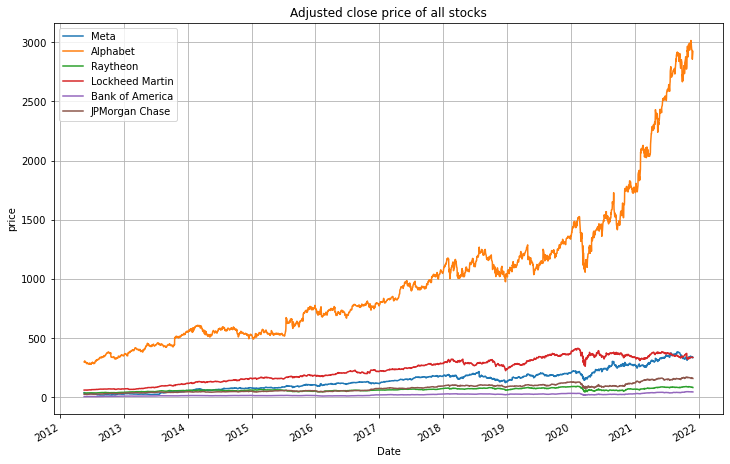

In [3]:
# plot del graifco, specificando i parametri necessari
adj_close_tot["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tot["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
adj_close_tot["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_tot["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
adj_close_tot["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_tot["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left") # per mostrare la legenda in alto a sx
plt.title("Adjusted close price of all stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

## 2. Statistiche descrittive

### 2.1 Settore tecnologico (FB e GOOG)

#### Rendimenti semplici

Tabella dei rendimenti semplici Netti e Lordi

In [4]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

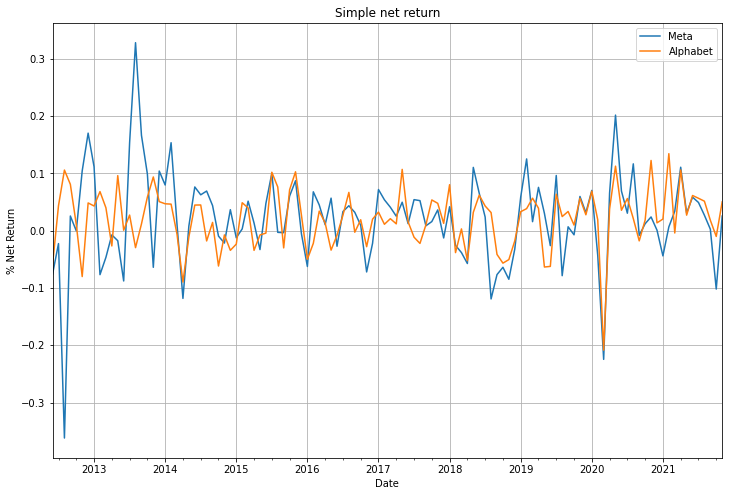

In [5]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper right")
plt.ylabel("% Net Return")
plt.title("Simple net return")
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [6]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Compositi Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Compositi Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Compositi Meta", "Rendimenti Compositi Alphabet"]]

,Rendimenti Compositi Meta,Rendimenti Compositi Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

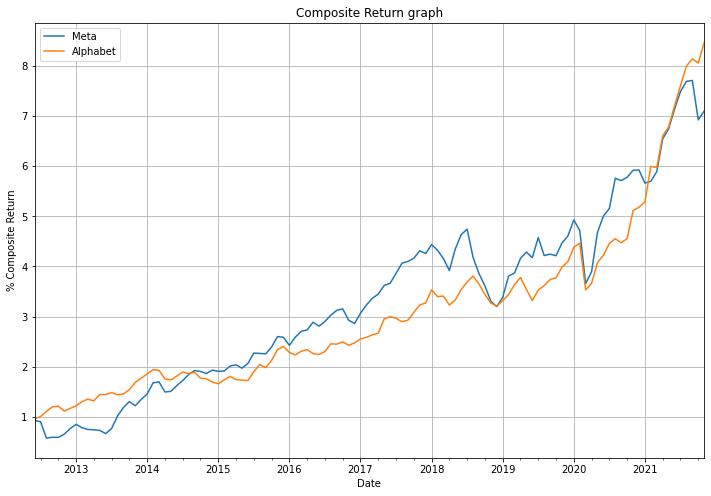

In [7]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli
rendimenti_tecno["Rendimenti Compositi Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Compositi Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper left")
plt.ylabel("% Composite Return")
plt.title("Composite Return graph")
plt.show()

#### Commenti aggiuntivi su titoli tecnologici

Confronto sulle serie storiche di FB e GOOG per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di GOOG e FB
2. Tabella con indice correlazione
3. Heatmap dell'indice di correlazione

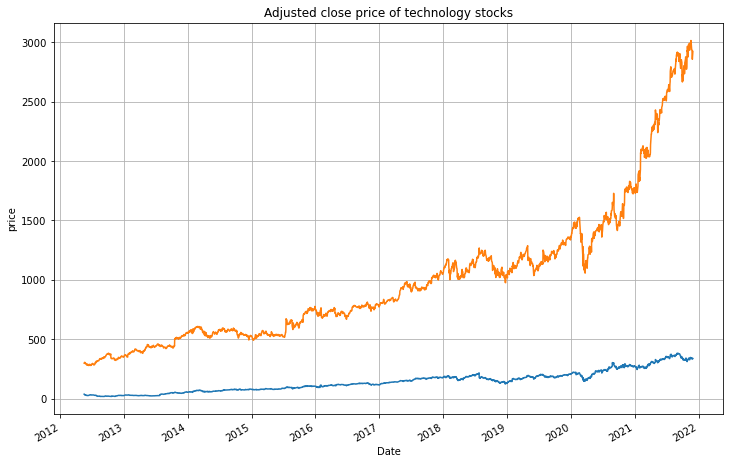

In [8]:
# Creiamo un nuovo dataframe per isolare il prezzo di GOOG e FB
adj_close_tecno = pd.DataFrame()

adj_close_tecno["Meta Price"] = fb_df[["Adj Close"]]
adj_close_tecno["Alphabet Price"] = goog_df[["Adj Close"]]

adj_close_tecno["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tecno["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
plt.title("Adjusted close price of technology stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

In [9]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_tecno.corr()

,Meta Price,Alphabet Price
Meta Price,1.000000,0.962272
Alphabet Price,0.962272,1.000000


#### Istogramma dei rendimenti settore tecnologico (FB e GOOG)

Istogramma per ritorno netto

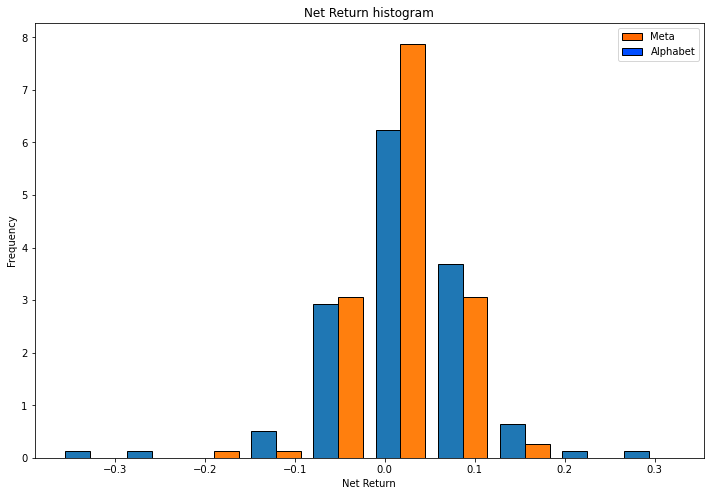

In [29]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib
from matplotlib.patches import Rectangle # per la legenda ci serve rectangle

cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]], density=True, edgecolor='black')
plt.title("Net Return histogram")
t_labels=["Meta", "Alphabet"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper right') # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return")
plt.ylabel("Frequency")


plt.show()

#### Dispersione rendimenti (FB e GOOG)

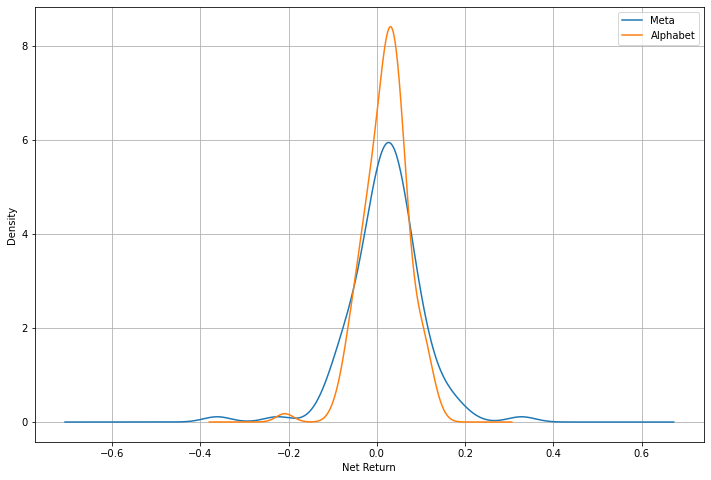

Deviazione Standard


Rendimenti Netti Meta        0.080678
Rendimenti Netti Alphabet    0.050795
dtype: float64

In [12]:
# Plot della dispersione dei rendimenti
rendimenti_tecno["Rendimenti Netti Meta"].plot.density(label="Meta", grid=True, figsize=(12,8),)
rendimenti_tecno["Rendimenti Netti Alphabet"].plot.density(label="Alphabet", grid=True, figsize=(12,8),)
plt.legend(loc="upper right")
plt.xlabel("Net Return")

plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]].std()

#### Grafici diagnostici a 4 sezioni per i titoli tecnologici (FB e GOOG)

I grafici richiesti per questo progetto sono:
- istogramma
- kernel density
- boxplot
- qq-plot

Iniziamo con Meta (FB)

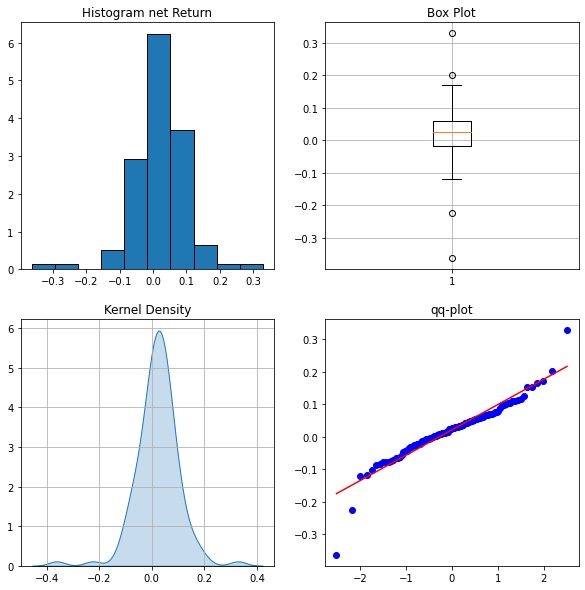

In [42]:
# Effettuiamo per la prima volta il plot di 3 grafici nella stessa immagine
from scipy import stats # importiamo stats dalla libreria scipy

rendimenti_netti_fb = rendimenti_netti_fb.dropna() # drop delle righe vuote (meta quotata solo da 2012)

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_fb["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_fb["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_fb["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_fb["Adj Close"],dist='norm',plot=plt)
plt.title("qq-plot")
plt.xlabel('') 
plt.ylabel('')

print("") # 